In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

# Any results you write to the current directory are saved as output.
data_train = pd.read_csv("E:/github/data/train.csv")
data_test = pd.read_csv("E:/github/data/test.csv")

data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.50,NaN,S
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.50,NaN,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.25,D37,C


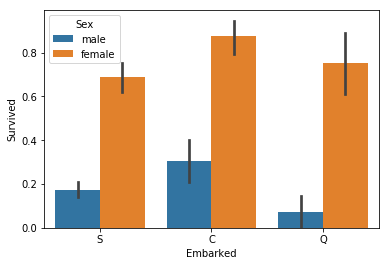

In [3]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);

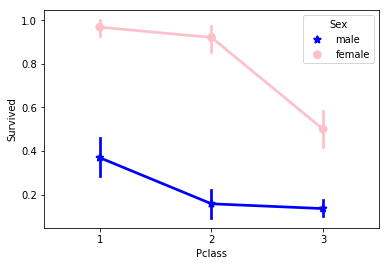

In [4]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male":"blue", "female":"pink"},
             markers=["*","o"], linestyle=["-","--"]);

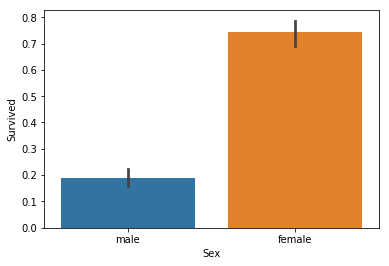

In [5]:
data_train["Survived"].value_counts()
#총 891명

data_train["Survived"].value_counts(normalize=True)
#사망 : 생존 = 61.6% : 38.3%

sur_fe = data_train["Survived"][data_train["Sex"] == "female"].value_counts(normalize=True)
# 여자-> 사망 : 생존  = 25%:74%

sur_me = data_train["Survived"][data_train["Sex"] == "male"].value_counts(normalize=True)
# 남자-> 사망 : 생존  = 81%:18%
#-> 성별로 사망, 생존이 크네

sns.barplot(x="Sex", y="Survived", data=data_train);

In [6]:
data_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [7]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1,0,5,12,18,25,35,60,120)
    group_names = ['Unknown','Baby', 'Child', 'Teenager', 'Student','Young Adult', 'Adult','Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x:x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1,0,8,15,31,1000)
    group_names = ['UnKnown', '1_quartile','2_quartile','3_quartile','4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x:x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x:x.split(' ')[1])
    return df

def drop_features(df):
    return df.drop(['Ticket','Name', 'Embarked'], axis = 1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


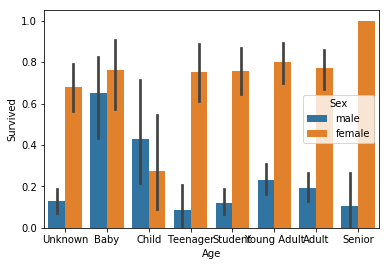

In [8]:
sns.barplot(x='Age', y="Survived", hue="Sex",
            data=data_train);

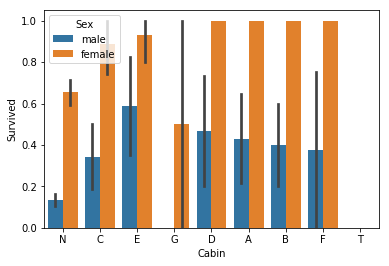

In [9]:
sns.barplot(x='Cabin', y="Survived", hue="Sex",
            data=data_train);

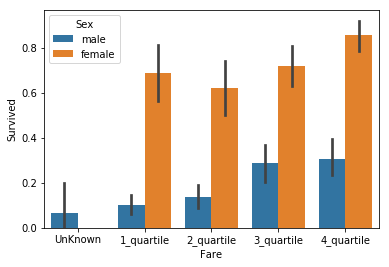

In [11]:
sns.barplot(x="Fare", y="Survived", hue="Sex",
            data=data_train);

In [12]:
from sklearn import preprocessing
def encode_features(df_train,df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)

def scale_df(df):
    temp_df = df[:]
    mx_name = max(temp_df["Lname"])
    mn_name = min(temp_df["Lname"])
    mx_NamePrefix = max(temp_df["NamePrefix"])
    mn_NamePrefix = min(temp_df["NamePrefix"])
    temp_df['Lname'] = temp_df.Lname.apply(lambda x:((x-mn_name)/(mx_name-mn_name)))
    temp_df['NamePrefix'] = temp_df.NamePrefix.apply(lambda x:((x-mn_NamePrefix)/(mx_NamePrefix-mn_NamePrefix)))
    return temp_df
data_train_tf = scale_df(data_train)
data_test_tf = scale_df(data_test)
data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19
5,6,0,3,1,6,0,0,1,7,538,19
6,7,0,1,1,0,0,0,3,4,500,19
7,8,0,3,1,1,3,1,2,7,608,13
8,9,1,3,0,7,0,2,1,7,382,20
9,10,1,2,0,5,1,0,2,7,559,20


In [14]:
import tensorflow as tf
tf.reset_default_graph()
keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32,[None, 9])
y = tf.placeholder(tf.float32,[None, 1])

w1 = tf.get_variable("w1",shape=[9,59],initializer=tf.contrib.layers.xavier_initializer())
layer1 = tf.nn.relu(tf.matmul(x,w1))
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)

#w2 = tf.Variable(tf.random_normal([59,129]))
w2 = tf.get_variable("w2",shape=[59,129],initializer=tf.contrib.layers.xavier_initializer())
layer2 = tf.nn.relu(tf.matmul(layer1,w2))
layer2 = tf.nn.dropout(layer2, keep_prob=keep_prob)

#w3 = tf.Variable(tf.random_normal([129,249]))
w3 = tf.get_variable("w3",shape=[129,249],initializer=tf.contrib.layers.xavier_initializer())
layer3 = tf.nn.relu(tf.matmul(layer2,w3))
layer3 = tf.nn.dropout(layer3, keep_prob=keep_prob)

#w4 = tf.Variable(tf.random_normal([249,1]))
w4 = tf.get_variable("w4",shape=[249,349],initializer=tf.contrib.layers.xavier_initializer())
layer4 = tf.nn.relu(tf.matmul(layer3,w4))
layer4 = tf.nn.dropout(layer4, keep_prob=keep_prob)

w5 = tf.get_variable("w5",shape=[349,1],initializer=tf.contrib.layers.xavier_initializer())

hypothesis = tf.nn.sigmoid(tf.matmul(layer4,w5))
cost = -tf.reduce_mean(y*tf.log(hypothesis)+(1-y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-1).minimize(cost)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

sess=tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(801):
    hy,cost_val,tt,pred,acc= sess.run([hypothesis,cost,train,predicted,accuracy], 
                                    feed_dict={x:data_train_tf.iloc[:,2:], 
                                               y:data_train.iloc[:,[1]],keep_prob:0.5})
    if step%100 == 0:
        print("learning")
        print(step,cost_val,acc)
        
test_result = pd.read_csv("E:/github/data/gender_submission.csv").iloc[:,[1]]
hh,pp,aa = sess.run([hypothesis,predicted,accuracy],feed_dict={x:scale_df(data_test).iloc[:,1:],
                                                               y:test_result,keep_prob:1})
print(aa)

learning
0 0.950397 0.447811
learning
100 0.640781 0.632997
learning
200 0.618177 0.652076
learning
300 0.585692 0.707071
learning
400 0.549645 0.753086
learning
500 0.518714 0.767677
learning
600 0.488065 0.785634
learning
700 0.484808 0.776655
learning
800 0.471655 0.786756
0.930622


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier()
clf.fit(data_train_tf.iloc[:,2:], data_train.iloc[:,[1]])

predict = clf.predict(scale_df(data_test).iloc[:,1:])
test_result = pd.read_csv("E:/github/data/gender_submission.csv").iloc[:,[1]]
ac_score = metrics.accuracy_score(test_result, predict)
cl_report = metrics.classification_report(test_result, predict)

print(ac_score)
print(cl_report)

0.825358851675
             precision    recall  f1-score   support

          0       0.87      0.85      0.86       266
          1       0.75      0.78      0.76       152

avg / total       0.83      0.83      0.83       418



E:\Users\ghyun\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
